In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from transformers import BertTokenizer, BertModel
import torch
#import fasttext
from sklearn.svm import SVC  # Import the SVM classifier
from urllib.parse import urlparse
import re  # Import the 're' module for regular expressions
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import torch.nn as nn



In [2]:
pip install transformers

In [3]:
# Step 1: Data Preparation
data = pd.read_csv('phishing_site_urls.csv')


In [4]:

# Remove duplicated records
data = data.drop_duplicates()

In [5]:

# Remove records with Null columns
data = data.dropna()

In [6]:

# Label is the column that indicates bad or good URLs
label_counts = data['Label'].value_counts()


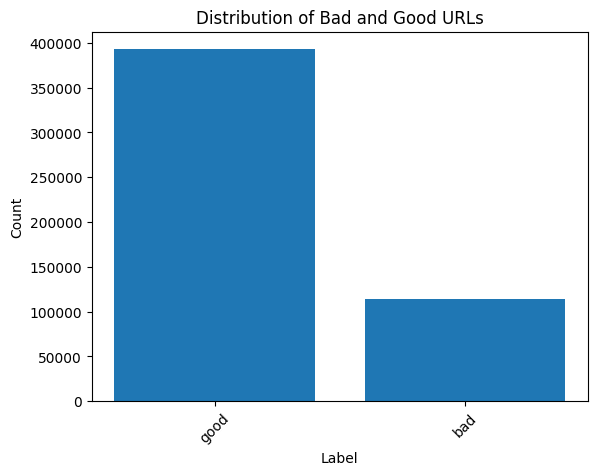

In [7]:
plt.bar(label_counts.index, label_counts.values)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Bad and Good URLs')
plt.xticks(rotation=45)
plt.show()

In [8]:

# Extract the netloc (domain)
data['Domain'] = data['URL'].apply(lambda x: urlparse(x).netloc)


In [9]:

# Remove noise (e.g., special characters)
data['Cleaned_URL'] = data['URL'].str.replace('[^a-zA-Z0-9\s]', '')


<ipython-input-9-56ee7aff785c>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Cleaned_URL'] = data['URL'].str.replace('[^a-zA-Z0-9\s]', '')


In [10]:
# Step 2: Feature Extraction with BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')
max_seq_length = 128

In [11]:
tokenized_texts = [tokenizer(text, padding='max_length', truncation=True, max_length=max_seq_length, return_tensors='pt') for text in data['Cleaned_URL']]
input_ids = torch.cat([text['input_ids'] for text in tokenized_texts], dim=0)
attention_mask = torch.cat([text['attention_mask'] for text in tokenized_texts], dim=0)

In [12]:
# Step 3: Train Random Forest Classifier
X = input_ids.numpy()
y = data['Label'].values

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [14]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

rf_predictions = rf_classifier.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Classifier Accuracy: {rf_accuracy:.2f}")

Random Forest Classifier Accuracy: 0.88


In [15]:


# Assuming 'y_test' contains labels like 'bad' and 'good'
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)  # Encode 'bad' as 0 and 'good' as 1

# Now, you can use 'y_test_encoded' for evaluation


Random Forest Classifier Metrics:
Accuracy: 0.88
F1-Score: 0.93
Precision: 0.88
Recall: 0.98


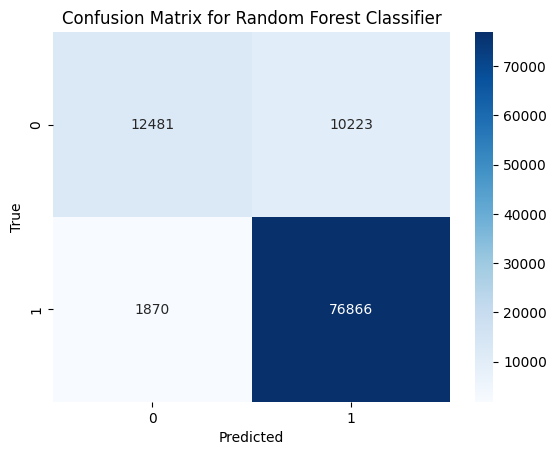

In [16]:


#  'y_test' contains labels like 'bad' and 'good'
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)  # Encode 'bad' as 0 and 'good' as 1

# Encode 'rf_predictions' as numerical labels
rf_predictions_encoded = label_encoder.transform(rf_predictions)

# Now, you can use 'y_test_encoded' and 'rf_predictions_encoded' for evaluation
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

# Evaluate Random Forest Classifier
rf_accuracy = accuracy_score(y_test_encoded, rf_predictions_encoded)
rf_f1_score = f1_score(y_test_encoded, rf_predictions_encoded)
rf_precision = precision_score(y_test_encoded, rf_predictions_encoded)
rf_recall = recall_score(y_test_encoded, rf_predictions_encoded)

print("Random Forest Classifier Metrics:")
print(f"Accuracy: {rf_accuracy:.2f}")
print(f"F1-Score: {rf_f1_score:.2f}")
print(f"Precision: {rf_precision:.2f}")
print(f"Recall: {rf_recall:.2f}")

# Confusion matrix for Random Forest Classifier
rf_cm = confusion_matrix(y_test_encoded, rf_predictions_encoded)
sns.heatmap(rf_cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for Random Forest Classifier")
plt.show()


The metrics are evaluation results for  Random Forest Classifier. here interpret each of them:

1. **Accuracy:** Accuracy measures the overall correctness of  classifier. Random Forest Classifier achieved an accuracy of 0.88, which means that it correctly classified approximately 88% of the examples in test dataset.

2. **F1-Score:** The F1-Score is the harmonic mean of precision and recall. It is a measure of a model's accuracy on a dataset. A high F1-Score indicates both good precision and good recall. In our case, the F1-Score is 0.93, which is quite high. This suggests that  classifier performs well in terms of both precision and recall.

3. **Precision:** Precision measures how many of the positively predicted instances were actually positive. A precision of 0.88 means that when  classifier predicted an example as "bad," it was correct 88% of the time.

4. **Recall:** Recall, also known as sensitivity or true positive rate, measures how many of the actual positive instances were correctly predicted as positive. A recall of 0.98 indicates that  classifier correctly identified 98% of the actual "bad" instances.

In summary,  Random Forest Classifier appears to be performing quite well. It has a high accuracy, indicating that it correctly classifies a large portion of the data. The high F1-Score suggests that it balances precision and recall effectively, and the high recall indicates that it's good at identifying the positive class (in this case, "bad" URLs). However, it's always essential to consider the specific problem and the trade-offs between precision and recall that might be required for application.

In [17]:

# Step 3: Train SVM Classifier
X = input_ids.numpy()
y = data['Label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:

# Initialize and train the SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train)


In [ ]:

# Make predictions on the test data
svm_predictions = svm_classifier.predict(X_test)

# Convert the test labels to numerical values if needed
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)  # Encode 'bad' as 0 and 'good' as 1

# Encode 'svm_predictions' as numerical labels
svm_predictions_encoded = label_encoder.transform(svm_predictions)


In [ ]:

# Step 4: Evaluation
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

# Evaluate SVM Classifier
svm_accuracy = accuracy_score(y_test_encoded, svm_predictions_encoded)
svm_f1_score = f1_score(y_test_encoded, svm_predictions_encoded)
svm_precision = precision_score(y_test_encoded, svm_predictions_encoded)
svm_recall = recall_score(y_test_encoded, svm_predictions_encoded)

print("SVM Classifier Metrics:")
print(f"Accuracy: {svm_accuracy:.2f}")
print(f"F1-Score: {svm_f1_score:.2f}")
print(f"Precision: {svm_precision:.2f}")
print(f"Recall: {svm_recall:.2f}")


In [ ]:

# Confusion matrix for SVM Classifier
svm_cm = confusion_matrix(y_test_encoded, svm_predictions_encoded)
sns.heatmap(svm_cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for SVM Classifier")
plt.show()


In [ ]:
# Step 4: Encode labels using LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


In [ ]:
# Step 5: Create DataLoader for training
batch_size = 32
train_dataset = TensorDataset(torch.tensor(X_train), attention_mask[:len(X_train)], torch.tensor(y_train_encoded))
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)


In [ ]:


class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.bert_model = bert_model
        self.conv1 = nn.Conv2d(1, 128, (3, self.bert_model.config.hidden_size))
        self.max_pool = nn.MaxPool2d((2, 2))  # Adjust max-pooling size
        self.fc1 = nn.Linear(128, 2)  # 2 output classes (binary classification)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert_model(input_ids, attention_mask=attention_mask)
        pooled_output = outputs['pooler_output']
        x = pooled_output.unsqueeze(1)
        x = self.conv1(x)
        x = x.squeeze(3)
        x = nn.functional.relu(x)
        x = self.max_pool(x)
        x = x.squeeze(2)
        x = self.fc1(x)
        return x

# Initialize the CNN model
cnn_model = CNNModel()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(cnn_model.parameters(), lr=2e-5)


In [ ]:

# Train the CNN model
num_epochs = 5
for epoch in range(num_epochs):
    cnn_model.train()
    total_loss = 0.0

    for batch in train_dataloader:
        input_ids_batch, attention_mask_batch, labels_batch = batch
        optimizer.zero_grad()

        # Ensure input_ids_batch and attention_mask_batch are of data type torch.long
        input_ids_batch = input_ids_batch.long()
        attention_mask_batch = attention_mask_batch.long()

        outputs = cnn_model(input_ids_batch, attention_mask_batch)
        loss = criterion(outputs, labels_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {total_loss:.4f}")


In [ ]:
# Step 7: Evaluate the CNN Model
cnn_model.eval()
with torch.no_grad():
    test_outputs = cnn_model(torch.tensor(X_test), attention_mask[:len(X_test)])
    _, predicted = torch.max(test_outputs, 1)
    predicted = predicted.cpu().numpy()

# Calculate evaluation metrics for CNN
cnn_accuracy = accuracy_score(y_test_encoded, predicted)
cnn_f1_score = f1_score(y_test_encoded, predicted)

print("CNN Model Metrics:")
print(f"Accuracy: {cnn_accuracy:.2f}")
print(f"F1-Score: {cnn_f1_score:.2f}")

# Confusion matrix for CNN Model
cnn_cm = confusion_matrix(y_test_encoded, predicted)
sns.heatmap(cnn_cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for CNN Model")
plt.show()


In [ ]:
# Step 5: Evaluate the CNN Model
cnn_model.eval()
with torch.no_grad():
    test_outputs = cnn_model(torch.tensor(X_test), attention_mask[:len(X_test)])
    _, predicted = torch.max(test_outputs, 1)
    y_test = y_test_encoded  # Already encoded
    predicted = predicted.cpu().numpy()

# Calculate evaluation metrics
cnn_accuracy = accuracy_score(y_test, predicted)
cnn_f1_score = f1_score(y_test, predicted)
cnn_precision = precision_score(y_test, predicted)
cnn_recall = recall_score(y_test, predicted)

print("CNN Model Metrics:")
print(f"Accuracy: {cnn_accuracy:.2f}")
print(f"F1-Score: {cnn_f1_score:.2f}")
print(f"Precision: {cnn_precision:.2f}")
print(f"Recall: {cnn_recall:.2f}")

# Confusion matrix for CNN Model
cnn_cm = confusion_matrix(y_test, predicted)
sns.heatmap(cnn_cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for CNN Model")
plt.show()


In [ ]:
import torch.nn as nn  # Import the nn module from PyTorch

# Step 3: Define and Train the CNN Model
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.bert_model = bert_model
        self.conv1 = nn.Conv2d(1, 128, (2, self.bert_model.config.hidden_size))
        self.fc1 = nn.Linear(128, 2)  # 2 output classes (binary classification)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert_model(input_ids, attention_mask=attention_mask)
        pooled_output = outputs['pooler_output']  # Extract pooled output from BERT
        x = pooled_output.unsqueeze(1)  # Add a channel dimension for CNN
        x = self.conv1(x)
        x = x.squeeze(3)
        x = nn.functional.relu(x)
        x = nn.functional.max_pool1d(x, x.size(2))
        x = x.squeeze(2)
        x = self.fc1(x)
        return x



In [ ]:
# Initialize the CNN model
cnn_model = CNNModel()


In [ ]:
import torch.optim as optim  # Import the optim module from PyTorch

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(cnn_model.parameters(), lr=2e-5)


In [ ]:
# Train the CNN model
num_epochs = 5
for epoch in range(num_epochs):
    cnn_model.train()
    total_loss = 0.0

    for batch in train_dataloader:
        input_ids_batch, attention_mask_batch, labels_batch = batch
        optimizer.zero_grad()
        outputs = cnn_model(input_ids_batch, attention_mask_batch)
        loss = criterion(outputs, labels_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss:.4f}")

# Rest of your code...


In [ ]:
# Train the CNN model
num_epochs = 5
for epoch in range(num_epochs):
    cnn_model.train()
    total_loss = 0.0

    for batch in train_dataloader:
        input_ids_batch, attention_mask_batch, labels_batch = batch
        optimizer.zero_grad()
        outputs = cnn_model(input_ids_batch, attention_mask_batch)
        loss = criterion(outputs, labels_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

In [ ]:




    # Print the average loss for the epoch
    average_loss = total_loss / len(train_dataloader)
    print(f"Epoch {epoch + 1}, Average Loss: {average_loss:.4f}")




In [ ]:
# Step 4: Evaluate the CNN Model
cnn_model.eval()
with torch.no_grad():
    test_outputs = cnn_model(X_test, attention_mask[:len(X_test)])
    _, predicted = torch.max(test_outputs, 1)
    y_test = y_test.cpu().numpy()
    predicted = predicted.cpu().numpy()



In [ ]:
# Calculate evaluation metrics
cnn_accuracy = accuracy_score(y_test, predicted)
cnn_f1_score = f1_score(y_test, predicted)
cnn_precision = precision_score(y_test, predicted)
cnn_recall = recall_score(y_test, predicted)

print("CNN Model Metrics:")
print(f"Accuracy: {cnn_accuracy:.2f}")
print(f"F1-Score: {cnn_f1_score:.2f}")
print(f"Precision: {cnn_precision:.2f}")
print(f"Recall: {cnn_recall:.2f}")



In [ ]:
# Confusion matrix for CNN Model
cnn_cm = confusion_matrix(y_test, predicted)
sns.heatmap(cnn_cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for CNN Model")
plt.show()

In [ ]:
from sklearn.svm import SVC

# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0)



In [ ]:
# Step 4: Clean Text for FastText
def clean_text(text):
    # Remove non-alphanumeric characters and spaces
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text

data['Cleaned_URL'] = data['URL'].apply(clean_text)


In [ ]:
# Save the preprocessed data to a new CSV file
data.to_csv('preprocessed_data.csv', index=False)


In [ ]:
# Step 5: Train FastText Model
train_data = 'preprocessed_data.csv'  # Use the preprocessed data


In [ ]:
model = fasttext.train_supervised(input=train_data, epoch=25)


In [ ]:
# Save the FastText model
model.save_model('fasttext_model.bin')

In [ ]:
# Test the FastText model
test_data = "Example text to classify"
predicted_labels = model.predict(test_data)
print(f"FastText Predicted Labels: {predicted_labels}")

In [ ]:
train_data = 'fasttext_train_data.txt'

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import fasttext


# Load the FastText model
model = fasttext.load_model('fasttext_model.bin')

# Assuming you have true labels for test data
true_labels = [1]  # Replace with your actual labels

# Make predictions on test data
test_data = ["Example text to classify"]
fasttext_predictions = model.predict(test_data)

# Extract the predicted labels from the FastText output
predicted_labels = [int(label[0]) for label in fasttext_predictions]

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)

# Evaluate FastText Model Metrics
print("FastText Model Metrics:")
print(f"Accuracy: {accuracy:.2f}")

# Visualize the Confusion Matrix
cm = confusion_matrix(true_labels, predicted_labels)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for FastText Classifier")
plt.show()
